In [1]:
import sys
sys.path.append("../")
import feature_search
from feature_search import fsearch
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 16, 5

## Works well at finding objects

In [3]:
im1_name = "../images/trailmix_parent_crop.jpg"
im2_name = "../images/trailmix_child.jpg"

In [4]:
# These are default parameters
rois, images = fsearch(im1_name, im2_name, score_cutoff=15, angle_cutoff=35, overlap_thresh=.3, show_final=False, search_mode='fast')

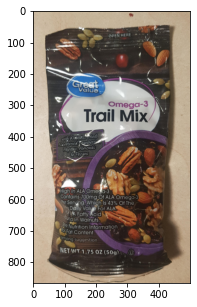

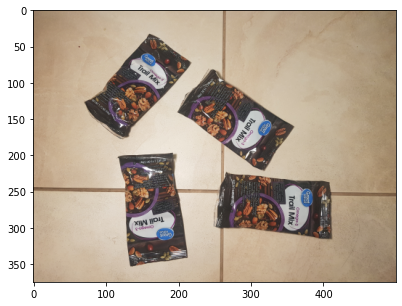

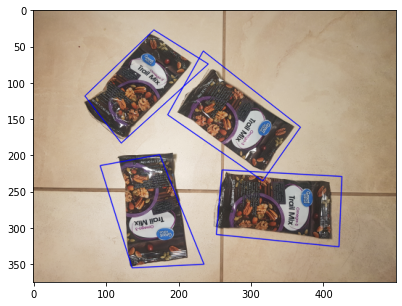

(<matplotlib.image.AxesImage at 0x7fd499cc0b38>, None)

In [5]:
plt.imshow(images['master']), plt.show()
plt.imshow(images['search']), plt.show()
plt.imshow(images['final']), plt.show()

In [6]:
len(rois)

4

## But there can be problems if the objects are too grouped up

This problem is due to the implementation of selective search. Although selective search is based off graph segmentation, which has no concept of bounding rectangles, most implementations of selective search will return a bounding rectangle that is aligned with the x and y axis of the image. This causes boxes to include multiple objects if they are not aligned with the image and are too close together. Perhaps in the future we can add selective search implementation to return a opencv mask and thus not have the problem of this. A quicker and more dirty solution would be to rotate the image 45 degrees and do the process again, after which we would merge the two answers with NMS.

## Even in noisy environments

s search


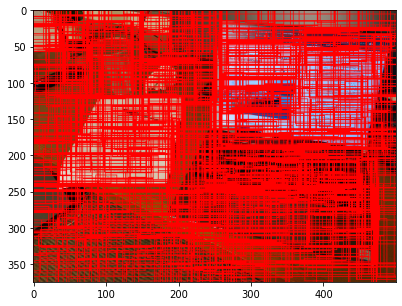

score_cutoff


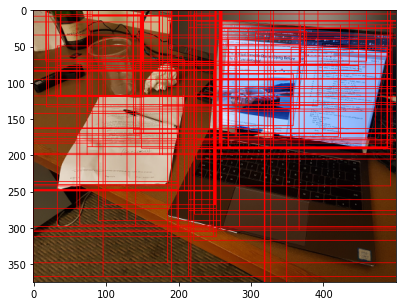

homography


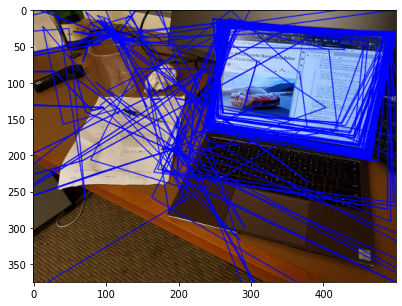

angle cutoff


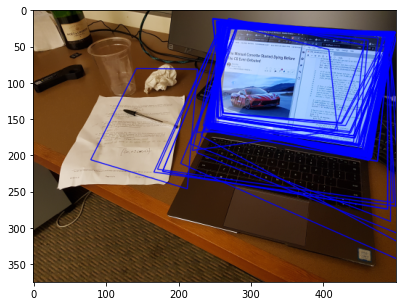

final


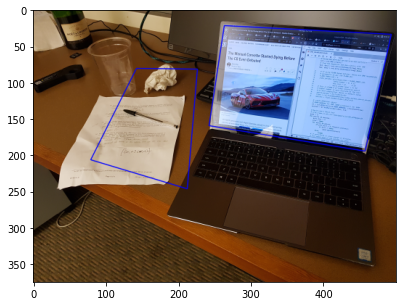

In [7]:
im1_name = "../images/screen.jpg"
im2_name = "../images/find_the_screen.jpg"
rois, images = fsearch(im1_name, im2_name, score_cutoff=30, show=True)

In [9]:
len(rois)

2

## Even if there are multiple

s search


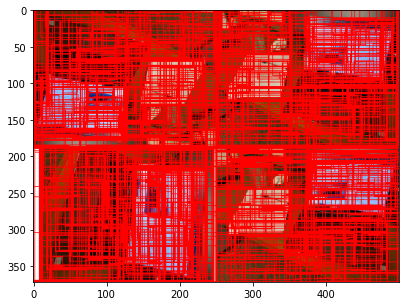

score_cutoff


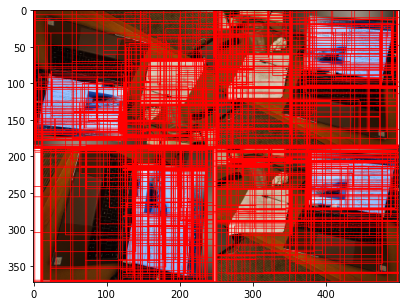

homography


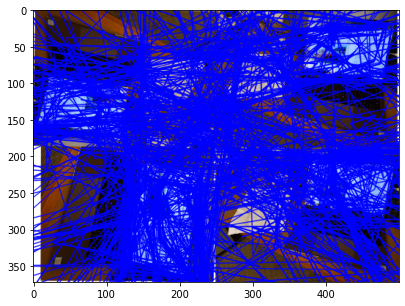

angle cutoff


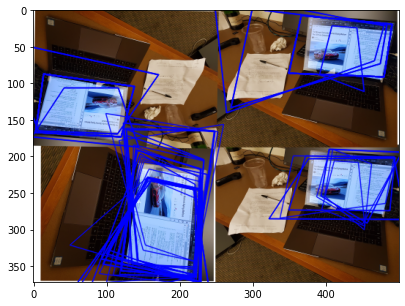

final


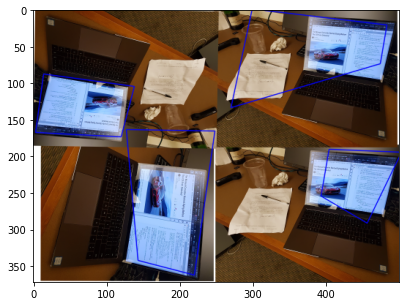

In [10]:
im1_name = "../images/screen.jpg"
im2_name = "../images/find_the_screens.jpg"
rois, images = fsearch(im1_name, im2_name, score_cutoff = 10, show=True, matchbox=True)

In [12]:
len(rois)

4

In [ ]:
plt.rcParams['figure.figsize'] = 20, 10
for img in images['angle_cutoff_matchboxes']:
    plt.imshow(img), plt.show()

In [16]:
len(rois[0])

6

In [17]:
rois[0][5]

[83.94521269721376, 109.66811147536966, 83.52910479459611, 82.85757103282047]